# Deep Generative Models for Graphs
  - chapter8에서 Graph를 embedding하는 Encoder에 대해 배웠다. (GCN, GraphSAGE)
    - 핵심: Node embedding을 Local Neighbors로부터 Representation 정보를 Aggregate하면서 진행
    
<img src ='./deep_graph_encoders.png' width="40%">
  

# chapter 10 (Decoder)
  - 학습된 모델로 부터 Graph를 생성하는 과정을 알아 볼 것이다
     - input은 무엇이고, output의 형태는 무엇인가.
     - 어떤 모델을 사용하며 object function은 무엇인가
     - 사용예제
<img src ='./deep_graph_decoders.png' width="40%">

  ## the problem of Graph Generation
   - we want to generate realistic graphs (real graph  ->  generate a synthetic graph)
   - why is it important
        - Generation - Gives insight into the graph formation process
        - Anomaly detection(이상 탐지) - adnomal behavior, evolution
        - predictions
        - simulations of novel graph sturctures
        - Graph completion - 그래프의 일부만 주어졌을 때 이어서 그려나갈 수 있다.
        - "what if" 시나리오
       
  #### Graph Generation Tasks
   - Task1 : 주어진 그래프와 비슷하게 만들어야 한다.
         - 이번강의의 핵심
   - Task2 : Goal-directed graph generation(주어진 목적/제약에 맞는 그래프를 생성해야 한다)
  
  #### It is hard
   - 1) Output space가 크고 다양하다. 
       - 만약 n개의 도드로 adjective matrix를 만든다면 $n^2$개의 value가 생성된다.( nxn행렬)
   - 2) Non - unique representations
       - n개의 Node로 한 그래프$n!$종류로 나타낼 수 있다
       - 이는 학습시 objective functions의 compute/optimize 를 어렵게 만든다. (이해가 안가서 아래 그림 첨부)
       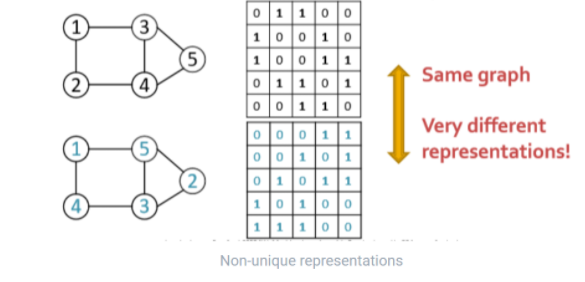
   - 3) complex dependencies
       - edge formation has long-range dependencies
       - 우리의 모델은 매 스텝마다 이러한 history를 기억하고 있어야한다. (이해가 안가서 아래 그림 첨부)
       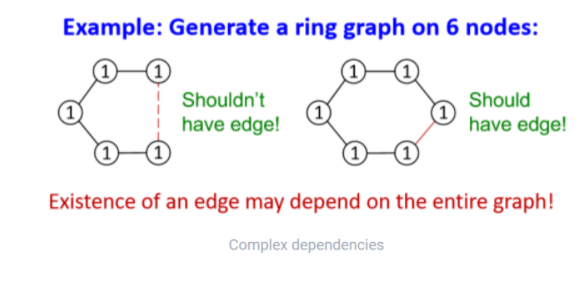
       
  ### ML Basics for Graph Generation
   - Give :$P_{data}(G)$로 부터 sampling 된 Graphs
   - Goal :$P_{model}(G)$의 distribution을 학습하고 이로부터 sample을 뽑을 수있어야 된다.
   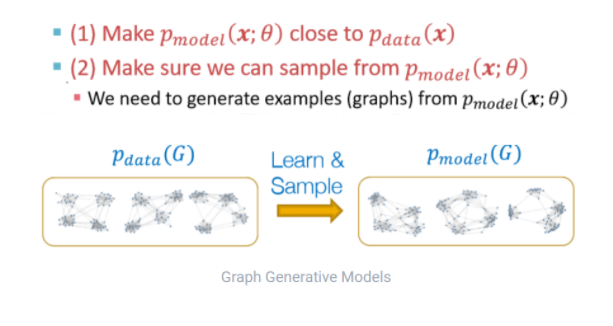
   
   #### Recap : Generative Models
     - SETup: Assume we want to learn a generative model from a set of data points(i.e., graphs) {$x_i$}
     - $P_{data}(G)$ is the data distribution, which is never known to us, but we have sampled $x_i ~ P_{data}(x)$
     - $P_{model}(x;\theta)$ is the model, parametrized by $\theta$ , that we use to approximate(근사) $P_{data}(G)$
     - Goal 
     - 1) make $P_{model}(x;\theta)$  close to $P_{data}(G)$ 
     - 2) make sure we can sample from $P_{model}(x;\theta)$ (we need to generate examples (graphs) from $P_{model}(x;\theta)$)
     
   - 1) Make $P_model(x;θ)$ close to $P_data(x)$
       - Key Principle : Maximum Likelihood
       - 관측치 x의 확률분포를 가장 잘 설명하는 파라미터 $\theta^*$를 학습
       - $\theta^* = argmax_{\theta}E_{x~p_{data}}log_{p_{model}}(x|\theta)$
   
   - 2) Make sure we can sample from $P_{model}(x;\theta)$
       - Goal : Sample from a complex distributon 
       - How : 정규분포로 샘플링 된 데이터 $z_i$를 함수 $f(.)$를 통하여 변환한다. $x_i = f(z_i ; \theta)$
       - 함수 $f$는 deep nn을 통해 train하여 구현(배울 내용)
       
   #### Auto-Regressive models
       - Dependence on what  we done.
       - $P_{model}(x;\theta)$가 앞서 언급한 2가지 Task를 모두 수행
       - Apply chain rule : joint distribution은 조건부확률들의 곱이다.
           - x가 벡터라면 $x_t$는 t번째 차원이다.
           - x가 문장이라면 $x_t$는 t번째 단어이다.
           - 모델이라면 $x_t$는 t번째 action이다. (action : add Node, add Edge, etc)
           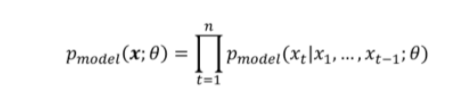